# Agglomerative Clustering

In [390]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

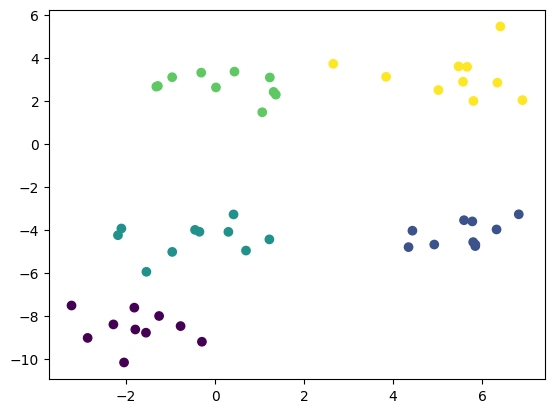

In [502]:
data, labels = make_blobs(n_samples=50, n_features=2, centers=5, random_state=40)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

## Point

In [492]:
def flatten(lst):
    """
    Returns a flattened version of the input list.
    """
    if not isinstance(lst, list):
        return [lst]
    
    flattened_lst = []
    for item in lst:
        if isinstance(item, list):
            flattened_lst.extend(flatten(item))
        else:
            flattened_lst.append(item)
    return flattened_lst

In [115]:
class Point:
    """ Class for a Point """
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def to_array(self):
        """ returns an array of the coordinates """
        return np.array([self.x, self.y])
    
    def dist(self, other):
        return np.linalg.norm(self.to_array() - other.to_array())
        
    def __eq__(self, other):
        """ Compares two points if they are equal """
        return np.allclose(self.to_array(), other.to_array())
    
    def __repr__(self):
        """ returns the string of the coordinates"""
        return f"Point({self.x}, {self.y})"

## Cluster

In [308]:
class Cluster:
    def __init__(self, points: list[Point,...]):
        self.points: list[Point,...] = points
        
    def add_point(self, point: Point):
        if point not in self.points:
            self.points.append(point)
    
    def add_points(self, points: list[Point, ...]):
        for point in points:
            self.add_point(point)
        
            
    def avg_dist(self, other):
        a_arr = np.array([i.to_array() for i in self.points])
        b_arr = np.array([i.to_array() for i in other.points])

        distances = np.linalg.norm(a_arr[:, np.newaxis] - b_arr, axis=2)

        result = np.mean(np.mean(distances, axis=1))
        return result
    
    def __repr__(self):
        return f"Cluster: {self.points}"

In [506]:
def fit(data):
    # make all the points in data as Points
    data_point: list[Point, ...] = [Point(i[0], i[1]) for i in data]

    # make every point as a cluster
    clusters = [Cluster([i]) for i in data_point]
    all_clusters = list(range(len(clusters)))
    a_c = []

    for _ in range(len(clusters) - 1):
        l = len(clusters)
        min_ = np.inf
        pairs = np.zeros(2, dtype=int)

        # find the minimum value's indexes
        for i in range(l):
            for j in range(i + 1 , l):
                d = clusters[i].avg_dist(clusters[j])
                if d < min_:
                    min_ = d
                    pairs[0], pairs[1] = i, j


        i, j = pairs

        # merge the pairs
        clusters[i].add_points(clusters[j].points)
        all_clusters[i] = [all_clusters[i], all_clusters[j]]


        # delete the next
        clusters.pop(j)
        all_clusters.pop(j)

        a_c.append(all_clusters[:])
        
    return a_c

In [507]:
result = fit(data)

### if I want 2 clusters:
```python
k = 2
a, b = a_c[-k]
```

In [513]:
# number of clusters required
k = 49

# getting the solution
new_label = [0] * len(labels)
for i in range(len(data)):
    for j in range(k):
        if i in flatten(result[-k][j]):
            new_label[i] = j
            
new_label = np.array(new_label)
new_label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

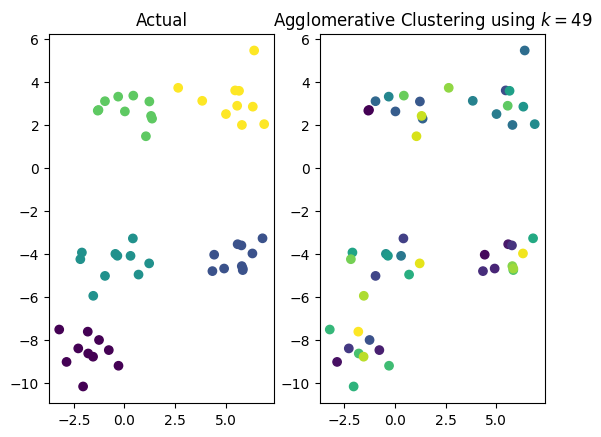

In [514]:
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title(f"Actual")

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=new_label)
plt.title(f"Agglomerative Clustering using $k={k}$")

plt.show()

In [469]:
from sklearn.metrics.cluster import rand_score

In [515]:
rand_score(labels, new_label)

0.8171428571428572

---

In [219]:
# logic for average linkage

a = [Point(12, 2)]
b = [Point(45, 46)]

ddd = 0
for i in a:
    dd = 0
    for j in b:
        d = i.dist(j)
        dd += d
    dd /= len(b)
    ddd += dd
    
ddd /= len(a)

ddd

55.0

In [220]:
# optimized with numpy

a_arr = np.array([i.to_array() for i in a])
b_arr = np.array([i.to_array() for i in b])

distances = np.linalg.norm(a_arr[:, np.newaxis] - b_arr, axis=2)

result = np.mean(np.mean(distances, axis=1))
result

55.0